<a href="https://colab.research.google.com/github/FastBackendML/FastBackendML/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.10 Использование CPU и GPU на примере простой НС

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

False

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
t1 = torch.arange(1,6, dtype=torch.int32, device=device)
t2 = torch.ones(15, dtype=torch.float32, device=device).view(3,5)
t_res = t2.matmul(t1.float()).to(device='cpu')

In [ ]:
t_res

tensor([15., 15., 15.])

Task 2

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
targets = torch.rand(1000).to(device)
predict = torch.rand(1000).to(device)

In [ ]:
Q = torch.sum(torch.pow((targets - predict), 2)) / 1000

In [ ]:
Q = Q.to('cpu')

In [ ]:
Q

tensor(169.7121)

Task 3

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

w = torch.rand(1, 16).to(device) # вектор-строка
X = torch.rand(16, 16).to(device) # матрица 16 x 16
I = torch.eye(16).to(device) # единичная матрица 16 x 16
lm = 0.5 # значение лямбда

In [ ]:
Q = w.matmul((X.add(I.mul(lm)))).matmul(w.transpose(0,1))

In [ ]:
Q.to('cpu')

tensor([[27.8480]])

Task 4

In [ ]:
import torch
# все эти переменные в программе не менять, только тензоры разместить на device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

W = torch.rand(3) * 10 - 5
bias = torch.rand(1) * 100 - 50

batch_size = 8 # размер мини-батча
X = torch.empty(batch_size, 3).normal_(mean=-1.0, std=4.0).to(device)
predict = (X.to(device).mv(W.to(device)) + bias.to(device)).sigmoid()

# 1.11 Персептрон - возможности классификации образов

In [ ]:
import torch

# тензор X в программе не менять
batch_size = 32 # количество входных данных
X = torch.tensor(list(map(float, input().split())), dtype=torch.float32).view(batch_size, 2)

def line_coeff(x0, y0, x1, y1):
    w1 = y1 - y0
    w2 = -(x1 - x0)
    w0 = x1 * y0 - x0 * y1
    return -w0, -w1, -w2


def activate(x):
    return torch.sign(x)


w10, w11, w12 = line_coeff(-4, -6, -5, -3)
w20, w21, w22 = line_coeff(-5, -3, 1, 5)
w30, w31, w32 = line_coeff(1, 5, 10, 9)
w0, w1, w2, w3 = 2.5, 1, 1, 1


W1 = torch.tensor([(w11, w12), (w21, w22), (w31, w32)], dtype=torch.float32)
bias1 = torch.tensor([w10, w20, w30], dtype=torch.float32)
W2 = torch.tensor([w1, w2, w3], dtype=torch.float32)
bias2 = torch.tensor([w0], dtype=torch.float32)


X1_out = activate(X @ W1.permute(1, 0) + bias1)
predict = activate(X1_out @ W2 + bias2)

In [ ]:
import torch


# тензор X в программе не менять
batch_size = 32 # количество входных данных
X = torch.tensor(list(map(float, input().split())), dtype=torch.float32).view(batch_size, 2)

W1 = torch.tensor([[-1.8,  1.0],
                   [-0.75,  1.0]])
bias1 = torch.tensor([-2.4, -4.5])
# Веса выходного слоя сделаем равные (равный вклад двух нейронов скрытого слоя)
W2 = torch.tensor([1.0, 1.0])
# Если оба выхода скрытого слоя нулевые, нужно сместить их сумму ниже нуля
bias2 = torch.tensor([0.5])

# Функция активации общая для всех трёх нейронов
act = lambda z: torch.where(z > 0.0, torch.ones_like(z), -torch.ones_like(z))

# Находим выход скрытого слоя
h = act(X @ W1.t() + bias1)

# Находим выход выходного слоя
predict = act(h @ W2 + bias2)
# predict


# 2.1 Идея обучения НС градиентным алгоритмом

Task 1

In [ ]:
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.1 * x ** 3


def df(x):
    return 0.5 + 0.4 * x - 0.3 * x ** 2


# здесь продолжайте программу
n = 0.01
x0 = -4
N = 200
x = x0

for i in range(N):
    dif = df(x)
    x = x - n * dif

Task 2

In [ ]:
import torch

# Целевая функция
def func(x):
    return 0.1 * x**2 - torch.sin(x) + 5.

# Данные
coord_x = torch.arange(-5.0, 5.0, 0.1)
coord_y = func(coord_x).view(-1, 1)  # [N, 1]

# Подготовка признаков: [1, x, x^2, x^3]
X = torch.stack([torch.ones_like(coord_x), coord_x, coord_x**2, coord_x**3], dim=1)  # [N, 4]

# Начальные параметры
w = torch.zeros((4, 1), dtype=torch.float32)  # [4, 1]
eta = torch.tensor([0.1, 0.01, 0.001, 0.0001]).view(4, 1)  # [4, 1]
N = 200
sz = coord_x.size(0)

# Градиентный спуск
for i in range(N):
    y_pred = X @ w  # [N, 1]
    error = y_pred - coord_y  # [N, 1]
    grad = (2 / sz) * (X.T @ error)  # [4, 1]
    w = w - eta * grad  # Поэлементное обновление

# Итоговая ошибка
y_pred = X @ w
Q = torch.mean((y_pred - coord_y)**2).item()

# 2.3 Функции активации и потерь в PyTorch

Task 1

In [ ]:
import torch

# значения x, func, predict не менять
x = torch.arange(-3, 3, 0.1)
func = x ** 2 - 2 * torch.cos(x) - 5
predict = func + torch.empty_like(func).normal_(0, 0.5)

loss_func = torch.nn.MSELoss()
Q = loss_func(predict, func).float().item()

Q_mse = torch.sum((predict - func)**2) / len(predict)
Q_mse = Q_mse.float().item()

Task 2

In [ ]:
import torch

# значения predict, target не менять
batch_size = 8
target = torch.randint(0, 2, (batch_size, 1), dtype=torch.float32) # целевые значения
predict = torch.empty(batch_size, 1).normal_(0, 2.0) # прогнозные значения

loss_func = torch.nn.BCEWithLogitsLoss()
Q = loss_func(predict, target).float().item()
sig_preds = torch.sigmoid(predict)
eps = 1e-7  # защита от log(0)
Q_bce = -torch.sum(target * torch.log(sig_preds + eps) + (1 - target) * torch.log(1 - sig_preds) + eps) / batch_size
Q_bce = Q_bce.float().item()
print(Q_bce, Q)

0.9961713552474976 0.9961714744567871


# 2.4 Автоматическое дифференцирование

Task 1

In [ ]:
import torch

d = float(input()) # значение d в программе не менять
t = torch.tensor([d], requires_grad=True)
f = 3 * t**2 + 5 * t - 2
f.backward()
print(f)
print(t.data, t.grad)

50
tensor([7748.], grad_fn=<SubBackward0>)
tensor([50.]) tensor([305.])


Task 2

In [ ]:
import torch

g = float(input()) # значение g в программе не менять
d = float(input()) # значение d в программе не менять

t = torch.tensor([d], requires_grad=True)

f = -(g * t**2) / 2 + g * torch.exp(-t) + 1.5

f.backward()

print(t.data, t.grad)
print(f)

50
30
tensor([30.]) tensor([-1500.])
tensor([-22498.5000], grad_fn=<AddBackward0>)


Task 3

In [ ]:
import torch

xx = float(input()) # значение xx в программе не менять
x = torch.tensor(xx, dtype=torch.float32)

x0, x1, x2, x3 = map(float, input().split()) # переменные x0, x1, x2, x3 в программе не менять

w0 = torch.tensor(x0, dtype=torch.float32, requires_grad=True)
w1 = torch.tensor(x1, dtype=torch.float32, requires_grad=True)
w2 = torch.tensor(x2, dtype=torch.float32, requires_grad=True)
w3 = torch.tensor(x3, dtype=torch.float32, requires_grad=True)

a = w0 + w1 * x + w2 * x**2 + w3 * x**3
f = 0.5 * x**2 - 2 * x - 5
L = (a - f)**2
L.backward()

# 2.5 Оптимизаторы. Реализация SGD на PyTorch

Task 1

In [ ]:
import torch

def func(x):
    return 0.2 * (x - 2) ** 2 - 0.3 * torch.cos(4 * x)


x0 = 0.0 # начальное значение точки минимума
lr = 0.1 # шаг обучения
N = 200 # число итераций градиентного алгоритма
x = torch.tensor([x0], dtype=torch.float32, requires_grad=True)

for i in range(N):
  y = func(x)
  y.backward()
  x.data = x.data - lr * x.grad
  x.grad.zero_()


Task 2

In [ ]:
import torch
import torch.optim as optim

def func(x):
    return 0.2 * (x - 2) ** 2 - 0.3 * torch.cos(4 * x)


lr = 0.1 # шаг обучения
x0 = 0.0 # начальное значение точки минимума
N = 200 # число итераций градиентного алгоритма
x = torch.tensor([x0], requires_grad=True)
optimizer = optim.RMSprop(params=[x], lr=lr)

for _ in range(N):
  y = func(x)
  y.backward()
  optimizer.step()
  optimizer.zero_grad()

Task 3

In [ ]:
import numpy as np
import torch
import torch.optim as optim

x_train = torch.tensor([(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)])
y_train = torch.tensor([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])
y_train = y_train.float()

total = len(y_train) # размер обучающей выборки
n_features = 3 # число параметров w0, w1, w2
lr = 0.1 # шаг обучения
N = 500 # число итераций градиентного алгоритма

np.random.seed(1) # установка "зерна" генератора датчика случайных чисел

X = torch.ones(total, 3)
X[:, 1:3] = x_train # матрица формата [(1, x11, x12), (1, x21, x22), ..., (1, xn1, xn2)]

w = torch.empty(n_features).uniform_(-1e-5, 1e-5) # начальные значения вектора w
w.requires_grad_(True)

# здесь продолжайте программу
BCE_loss = torch.nn.BCEWithLogitsLoss()
optimizer = optim.Adam(params=[w], lr=lr)
for _ in range(N):
    k = np.random.randint(0, total)
    loss = BCE_loss(X[k] @ w, y_train[k])
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Q = torch.mean((torch.sign(X @ w) == (y_train * 2 - 1)).float())


Task 4

In [ ]:
import numpy as np
import torch
import torch.optim as optim

def model(x, w1, w2, b1, b2):
    x = w1 @ x + b1
    x = torch.tanh(x)
    x = w2 @ x + b2
    return x


np.random.seed(1) # установка "зерна" генератора датчика случайных чисел
torch.manual_seed(123)

W1 = torch.empty(2, 2).normal_(0, 1e-5)
bias1 = torch.rand(2, requires_grad=True)
W2 = torch.empty(1, 2).normal_(0, 1e-5)
bias2 = torch.rand(1, requires_grad=True)

W1.requires_grad_(True)
W2.requires_grad_(True)

# обучающая выборка
n_items = 20
C00 = torch.empty(n_items, 2).normal_(0, 1)
C11 = torch.empty(n_items, 2).normal_(0, 1) + torch.FloatTensor([5, 5])
C01 = torch.empty(n_items, 2).normal_(0, 1) + torch.FloatTensor([0, 5])
C10 = torch.empty(n_items, 2).normal_(0, 1) + torch.FloatTensor([5, 0])

x_train = torch.cat([C00, C11, C01, C10])
y_train = torch.cat([torch.ones(n_items * 2), torch.zeros(n_items * 2)])

lr = 0.01  # шаг обучения
N = 1000  # число итераций при обучении
total = y_train.size(0) # размер обучающей выборки

# здесь продолжайте программу

Loss = torch.nn.BCEWithLogitsLoss()
optimizer = optim.Adam(params=[W1, W2, bias1, bias2], lr=lr)

for _ in range(N):
    k = np.random.randint(0, total)
    y = model(x_train[k], W1, W2, bias1, bias2)
    loss = Loss(y, y_train[k].unsqueeze(0))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

a = (np.sign([model(x, W1, W2, bias1, bias2).item() for x in x_train]) + 1) / 2
Q = np.mean(a == y_train.numpy())
Q

np.float64(0.95)

# 2.6 Классы nn.Linear и nn.Module

Task 1

In [ ]:
import torch
import torch.nn as nn

# тензор x в программе не менять
x = torch.tensor(list(map(float, input().split())), dtype=torch.float32)

# здесь продолжайте программу
layer = nn.Linear(16, 1, bias=False)
layer.weight = nn.Parameter(torch.ones(1, 16))
round(layer(x).item(), 1)

 -1.6 7.8 3.6 0.1 3.7 5.9 -1.8 10.0 -0.6 -2.8 0.8 0.4 9.5 2.4 4.9 9.6


51.9

Task 2

In [ ]:
import torch
import torch.nn as nn

# здесь объявляйте класс модели (обязательно до тензора x)
class TwoLayerModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(3, 2)
    self.layer2 = nn.Linear(2, 1)

  def forward(self, x):
    x = self.layer1(x)
    x = torch.sigmoid(x)
    x = self.layer2(x)
    return x

model = TwoLayerModel()
model.eval()

x = torch.rand(3) # тензор x в программе не менять

# здесь продолжайте программу
predict = model(x)

Task 3

In [ ]:
import torch
import torch.nn as nn

# здесь объявляйте класс модели (обязательно до тензора x)
class ThreeLayersModel(nn.Module):
  def __init__(self, n_input, layer1_input, layer2_input, n_output):
    super().__init__()
    self.layer1 = nn.Linear(n_input, layer1_input)
    self.layer2 = nn.Linear(layer1_input, layer2_input)
    self.layer3 = nn.Linear(layer2_input, n_output)

  def forward(self, x):
    x = self.layer1(x)
    x = torch.tanh(x)
    x = self.layer2(x)
    x = torch.tanh(x)
    x = self.layer3(x)
    x = torch.tanh(x)
    return x


model = ThreeLayersModel(32, 10, 12, 1)
model.eval()

batch_size = 4
x = torch.rand(batch_size, 32) # тензор x в программе не менять

# здесь продолжайте программу
predict = model(x)

In [ ]:
predict

tensor([[0.3561],
        [0.2227],
        [0.3309],
        [0.3334]], grad_fn=<TanhBackward0>)

Task 4

In [ ]:
import torch
import torch.nn as nn

# здесь объявляйте класс модели (обязательно до тензора x_train)
class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2, 3)
    self.layer2 = nn.Linear(3, 1)

  def forward(self, x):
    x = self.layer1(x)
    x = torch.tanh(x)
    x = self.layer2(x)
    x = torch.sigmoid(x)
    return x

model = MyModel()
model.eval()

# тензор x_train в программе не менять
x_train = torch.tensor([(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3),
                        (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9),
                        (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2),
                        (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9),
                        (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6),
                        (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0),
                        (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1),
                        (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7),
                        (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3),
                        (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3),
                        (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4),
                        (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1),
                        (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5),
                        (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4),
                        (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3),
                        (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3),
                        (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0),
                        (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5),
                        (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3),
                        (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)])

# здесь продолжайте программу
predict = []
for x in x_train:
  with torch.no_grad():
    y = model(x)
    predict.append(y.item())

Task 5

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# здесь объявляйте класс TriagModel
class TriagModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3, 1, bias=False)

    def forward(self, x):
        x = self.layer1(x)
        return x


np.random.seed(1)
torch.manual_seed(1)

total = 100
x_train = torch.randint(1, 10, (total, 3), dtype=torch.float32)
y_train = x_train.sum(dim=1) / 3

# здесь создавайте модель (model)
# переведите модель в режим обучения
model = TriagModel()
model.eval()

lr = 0.01 # шаг обучения
N = 1000 # число итераций SGD

optimizer = optim.Adam(params=model.parameters(), lr=lr)
loss_func = nn.MSELoss()# здесь создайте функцию потерь с помощью класса nn.MSELoss

for _ in range(N):
    k = np.random.randint(0, total)
    predict = model(x_train[k])
    loss = loss_func(predict, y_train[k])# вычислите значение функции потерь и сохраните результат в переменной loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Task 6

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# здесь объявляйте класс ClassModel
class ClassModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2,3)
        self.layer2 = nn.Linear(3,1)

    def forward(self, x):
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        return x


np.random.seed(1)
torch.manual_seed(1)

# обучающая выборка: x_train - входные значения; y_train - целевые значения
x_train = torch.tensor([(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)])
y_train = torch.FloatTensor([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])

model = ClassModel()
model.eval()

total = x_train.size(0) # размер обучающей выборки
N = 1000 # число итераций алгоритма SGD
batch_size = 8

optimizer = optim.Adam(params=model.parameters(), lr=0.01)# задайте оптимизатор Adam с шагом обучения lr=0.01
loss_func = nn.BCEWithLogitsLoss()

for _ in range(N):
    idx = np.random.choice(total, batch_size, False)
    # пропустите через модель k-й образ выборки x_train и вычислите прогноз predict
    predict = model(x_train[idx])
    loss = loss_func(predict.squeeze(1), y_train[idx])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


with torch.no_grad():
    a_new = ([1 if model(x_train[i]) > 0 else 0 for i in range(total)])
    Q = np.array([1 if a_new[i] == y_train[i] else 0 for i in range(total)]).mean()


In [ ]:
Q

np.float64(0.93)

# 2.8 Классы Dataset и Dataloader

Task 1

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as data

# здесь продолжайте программу
func = lambda x: 2 * torch.exp(-x / 2) + 0.2 * torch.sin(x / 10) - 5

coord_x = torch.arange(-5, 5, 0.1)

class FuncDataset(data.Dataset):
  def __init__(self):
    self.data = coord_x
    self.targets = torch.FloatTensor([func(x) for x in coord_x])

  def __len__(self):
    return len(self.data)

  def __getitem__(self, item):
        return tuple([self.data[item], self.targets[item]])

d_train = FuncDataset()
x13, y13 = d_train[13]
total = len(d_train)

Task 2

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as data

data_y = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1]

# здесь продолжайте программу
class ClassDataset(data.Dataset):
  def __init__(self):
    self.data = torch.FloatTensor([(5.3, 2.3), (5.7, 2.5), (4.0, 1.0), (5.6, 2.4), (4.5, 1.5), (5.4, 2.3), (4.8, 1.8), (4.5, 1.5), (5.1, 1.5), (6.1, 2.3), (5.1, 1.9), (4.0, 1.2), (5.2, 2.0), (3.9, 1.4), (4.2, 1.2), (4.7, 1.5), (4.8, 1.8), (3.6, 1.3), (4.6, 1.4), (4.5, 1.7), (3.0, 1.1), (4.3, 1.3), (4.5, 1.3), (5.5, 2.1), (3.5, 1.0), (5.6, 2.2), (4.2, 1.5), (5.8, 1.8), (5.5, 1.8), (5.7, 2.3), (6.4, 2.0), (5.0, 1.7), (6.7, 2.0), (4.0, 1.3), (4.4, 1.4), (4.5, 1.5), (5.6, 2.4), (5.8, 1.6), (4.6, 1.3), (4.1, 1.3), (5.1, 2.3), (5.2, 2.3), (5.6, 1.4), (5.1, 1.8), (4.9, 1.5), (6.7, 2.2), (4.4, 1.3), (3.9, 1.1), (6.3, 1.8), (6.0, 1.8), (4.5, 1.6), (6.6, 2.1), (4.1, 1.3), (4.5, 1.5), (6.1, 2.5), (4.1, 1.0), (4.4, 1.2), (5.4, 2.1), (5.0, 1.5), (5.0, 2.0), (4.9, 1.5), (5.9, 2.1), (4.3, 1.3), (4.0, 1.3), (4.9, 2.0), (4.9, 1.8), (4.0, 1.3), (5.5, 1.8), (3.7, 1.0), (6.9, 2.3), (5.7, 2.1), (5.3, 1.9), (4.4, 1.4), (5.6, 1.8), (3.3, 1.0), (4.8, 1.8), (6.0, 2.5), (5.9, 2.3), (4.9, 1.8), (3.3, 1.0), (3.9, 1.2), (5.6, 2.1), (5.8, 2.2), (3.8, 1.1), (3.5, 1.0), (4.5, 1.5), (5.1, 1.9), (4.7, 1.4), (5.1, 1.6), (5.1, 2.0), (4.8, 1.4), (5.0, 1.9), (5.1, 2.4), (4.6, 1.5), (6.1, 1.9), (4.7, 1.6), (4.7, 1.4), (4.7, 1.2), (4.2, 1.3), (4.2, 1.3)])
    self.targets = torch.FloatTensor([1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1])

  def __len__(self):
    return len(self.targets)

  def __getitem__(self, indx):
    return tuple([self.data[indx], self.targets[indx]])


batch_size = 12
d_train = ClassDataset()
train_data = data.DataLoader(d_train, batch_size, shuffle=True, drop_last=True)
data_sum = torch.zeros(batch_size, 2)
for n in train_data:
    data_sum += n[0]


# 2.9 Применение классов Dataset и Dataloader

Task 1

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as data

class LinnerudDataset(data.Dataset):
      def __init__(self):
          data_x = [[5.0, 162.0, 60.0], [2.0, 110.0, 60.0], [12.0, 101.0, 101.0], [12.0, 105.0, 37.0], [13.0, 155.0, 58.0], [4.0, 101.0, 42.0], [8.0, 101.0, 38.0], [6.0, 125.0, 40.0], [15.0, 200.0, 40.0], [17.0, 251.0, 250.0], [17.0, 120.0, 38.0], [13.0, 210.0, 115.0], [14.0, 215.0, 105.0], [1.0, 50.0, 50.0], [6.0, 70.0, 31.0], [12.0, 210.0, 120.0], [4.0, 60.0, 25.0], [11.0, 230.0, 80.0], [15.0, 225.0, 73.0], [2.0, 110.0, 43.0]]
          target = [[191.,  36.,  50.], [189.,  37.,  52.], [193.,  38.,  58.], [162.,  35.,  62.], [189.,  35.,  46.], [182.,  36.,  56.], [211.,  38.,  56.], [167.,  34.,  60.], [176.,  31.,  74.], [154.,  33.,  56.], [169.,  34.,  50.], [166.,  33.,  52.], [154.,  34.,  64.], [247.,  46.,  50.], [193.,  36.,  46.], [202.,  37.,  62.], [176.,  37.,  54.], [157.,  32.,  52.], [156.,  33.,  54.], [138.,  33.,  68.]]
          self.data = torch.FloatTensor(data_x)
          self.targets = torch.FloatTensor(target)
          self.categories = ['Weight', 'Waist', 'Pulse']
          self.features = ['Chins', 'Situps', 'Jumps']

      def __len__(self):
          return len(self.targets)

      def __getitem__(self, indx):
          return tuple([self.data[indx], self.targets[indx]])


d_train = LinnerudDataset()
train_data = data.DataLoader(d_train, batch_size=8, shuffle=False, drop_last=False)
train_data = iter(train_data)
next(train_data)
x, y = next(train_data)

Task 2

In [ ]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim


class FuncDataset(data.Dataset):
    def __init__(self):
        _x = torch.arange(-5, 5, 0.1)
        self.data = _x
        func = lambda x: torch.sin(2 * x) + 0.2 * torch.cos(10 * x) + 0.1 * x**2
        self.target = torch.FloatTensor([func(x) for x in self.data]) # значения функции в точках _x
        self.length = len(self.data)# размер обучающей выборки

    def __getitem__(self, item):
        return self.data[item], self.target[item] # возврат образа по индексу item в виде кортежа: (данные, целевое значение)

    def __len__(self):
        return self.length# возврат размера выборки


class FuncModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3, 1)
        # модель однослойной полносвязной нейронной сети:
        # 1-й слой: число входов 3 (x, x^2, x^3), число нейронов 1

    def forward(self, x):
        xx = torch.empty(x.size(0), 3)
        xx[:, 0] = x
        xx[:, 1] = x ** 2
        xx[:, 2] = x ** 3
        y = self.layer1(xx)
        return y


torch.manual_seed(1)

# создать модель FuncModel
# перевести модель в режим обучения
model = FuncModel()
model.train()

epochs = 20 # число эпох обучения
batch_size = 8 # размер батча

d_train = FuncDataset()# создать объект класса FuncDataset
train_data = data.DataLoader(d_train, batch_size=batch_size, shuffle=True, drop_last=False) # создать объект класса DataLoader с размером пакетов batch_size и перемешиванием образов выборки

optimizer = optim.Adam(params=model.parameters(), lr=0.01) # создать оптимизатор Adam для обучения модели с шагом обучения 0.01
loss_func = nn.MSELoss() # создать функцию потерь с помощью класса MSELoss

for _e in range(epochs): # итерации по эпохам
    for x_train, y_train in train_data:
        predict = model(x_train).squeeze()  # вычислить прогноз модели для данных x_train
        loss = loss_func(predict, y_train)  # вычислить значение функции потерь

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


model.eval()
predict = model(d_train.data)
# перевести модель в режим эксплуатации
# выполнить прогноз модели по всем данным выборки (d_train.data)
Q = loss_func(predict.data.squeeze(), d_train.target).item()   # вычислить потери с помощью loss_func по всем данным выборки; значение Q сохранить в виде вещественного числа

In [ ]:
Q

0.5361676812171936

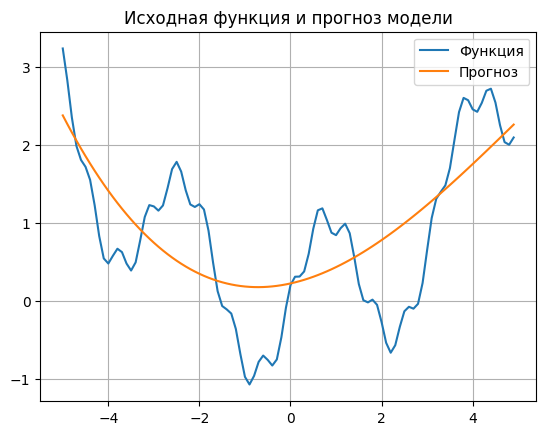

In [ ]:
# График
import matplotlib.pyplot as plt

plt.plot(d_train.data, d_train.target, label='Функция')
plt.plot(d_train.data,predict.detach(), label='Прогноз')
plt.legend()
plt.title('Исходная функция и прогноз модели')
plt.grid()
plt.show()

Task 3

In [ ]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim

class FuncDataset(data.Dataset):
    def __init__(self):
        _range = torch.arange(-3, 3, 0.1)
        self.data = torch.tensor([(_x, _y) for _x in _range for _y in _range])
        self.target = self._func(self.data)
        self.length =len(self.data) # размер обучающей выборки

    @staticmethod
    def _func(coord):
        _x, _y = coord[:, 0], coord[:, 1]
        return torch.sin(2 * _x) * torch.cos(3 * _y) + 0.2 * torch.cos(10 * _x) * torch.sin(8 * _x) + 0.1 * _x ** 2 + 0.1 * _y ** 2

    def __getitem__(self, item):
        return self.data[item], self.target[item] # возврат образа по индексу item в виде кортежа: (данные, целевое значение)

    def __len__(self):
       return self.length # возврат размера выборки


class FuncModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(6, 1)
        # модель однослойной полносвязной нейронной сети:
        # 1-й слой: число входов 6 (x, x^2, x^3, y, y^2, y^3), число нейронов 1

    def forward(self, coord):
        x, y = coord[:, 0], coord[:, 1]
        x.unsqueeze_(-1)
        y.unsqueeze_(-1)

        xx = torch.empty(coord.size(0), 6)
        xx[:, :3] = torch.cat([x, x ** 2, x ** 3], dim=1)
        xx[:, 3:] = torch.cat([y, y ** 2, y ** 3], dim=1)
        y = self.layer1(xx)
        return y

# здесь продолжайте программу
model = FuncModel()
model.train()

epochs = 20
batch_size = 16
lr = 0.01

d_train = FuncDataset()
train_data = data.DataLoader(d_train, batch_size, shuffle=True, drop_last=False)

optimizer = optim.RMSprop(params=model.parameters(), lr=lr)
loss_func = nn.MSELoss()

for _ in range(epochs):
    for x_train, y_train in train_data:
        predict = model(x_train).squeeze()
        loss = loss_func(predict, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

model.eval()
predict = model(d_train.data)
Q = loss_func(predict.data.squeeze(), d_train.target).item()
Q

0.29568415880203247

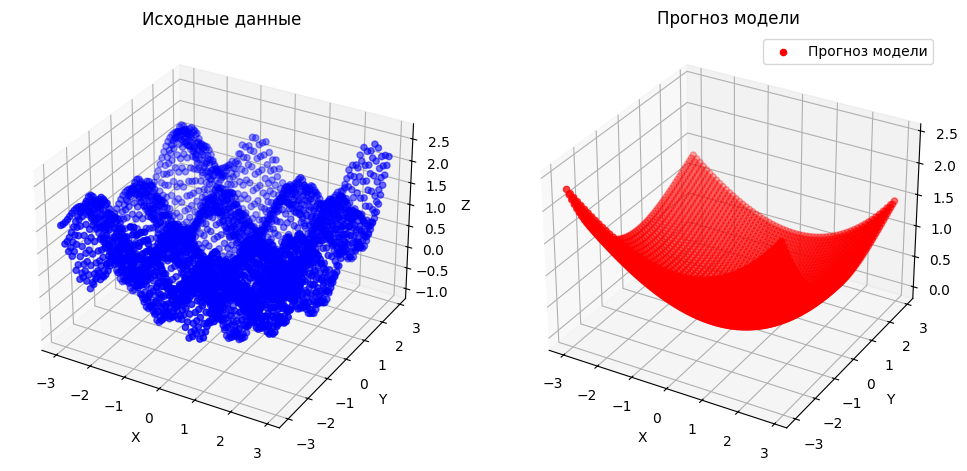

In [ ]:
# График
import matplotlib.pyplot as plt

x = d_train.data[:, 0]
y = d_train.data[:, 1]
z_real = d_train.target
z_pred = predict.data.squeeze()

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z_real, c='b', label='Исходные данные')
ax1.set_title('Исходные данные')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x, y, z_pred, c='r', label='Прогноз модели')
ax2.set_title('Прогноз модели')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.legend()
plt.show()

Task 4

In [ ]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim


# здесь продолжайте программу
class FuncDataset(data.Dataset):
      def __init__(self, _global_var_data_x, _global_var_target):
          self.data = torch.tensor(_global_var_data_x)
          self.target = torch.tensor(_global_var_target)

      def __getitem__(self, item):
          return self.data[item], self.target[item]

      def __len__(self):
          return len(self.target)


class FuncModel(nn.Module):
          def __init__(self):
              super().__init__()
              self.layer1 = nn.linear(10, 64)
              self.layer2 = nn.Linear(64, 1)

          def forward(self, x):
              x = self.layer1(x)
              x = torch.tanh(x)
              x = self.layer2(x)


model = FuncModel()
model.train()

epochs = 10
batch_size = 8
lr = 0.01

d_train = FuncDataset()
train_data = data.DataLoader(d_train, batch_size, shuffle=True, drop_last=False)

optimizer = optim.RMSprop(params=model.parameters(), lr=lr)
loss_func = nn.MSELoss()

for _ in range(epochs):
    for x_train, y_train in train_data:
        predict = model(x_train).squeeze()
        loss = loss_func(predict, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

model.eval()
predict = model(d_train.data)
Q = loss_func(predict.data.squeeze(), d_train.target).item()


Task 5

In [55]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim


# здесь продолжайте программу
class FuncDataset(data.Dataset):
    def __init__(self):
        _x = torch.arange(-6, 6, 0.1)
        self.data = _x
        self.target = self._y_func(_x)

    def __getitem__(self, item):
        return self.data[item], self.target[item]

    def __len__(self):
        return len(self.target)

    @staticmethod
    def _y_func(coord):
        _x = 0.5 * coord + torch.sin(2*coord) - 0.1 * torch.exp(coord / 2) - 12.5
        return _x


class FuncModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3, 1)

    def forward(self, x):
        xx = torch.FloatTensor([(_x, _x ** 2, _x ** 3) for _x in x])
        return self.layer1(xx)



model = FuncModel()
model.train()

epochs = 20
lr = 0.1
batch_size = 10

d_train = FuncDataset()
train_data = data.DataLoader(d_train, batch_size, shuffle=True, drop_last=False)

optimizer = optim.RMSprop(params=model.parameters(), lr=lr)
loss_func = nn.MSELoss()

for _ in range(epochs):
    for x_train, y_train in train_data:
        predict = model(x_train).squeeze(1)
        loss = loss_func(predict, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


model.eval()
predict = model(d_train.data).squeeze(1)
Q = loss_func(predict, d_train.target).item()

Parameter containing:
tensor([[ 0.5178, -0.0625, -0.0029]], requires_grad=True) Parameter containing:
tensor([-12.1167], requires_grad=True)


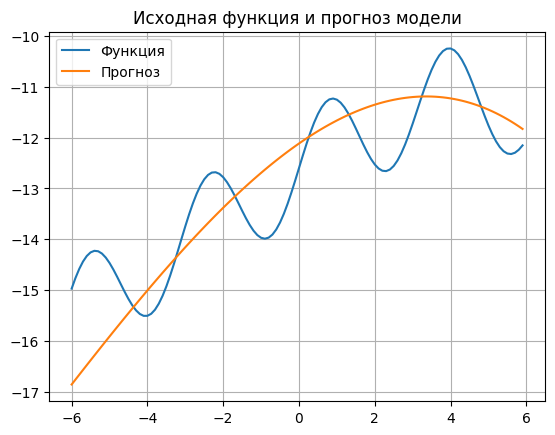

In [56]:
# Вычисленные параметры многочлена (веса и смещение)
print(*model.parameters())

# График
import matplotlib.pyplot as plt

plt.plot(d_train.data, d_train.target, label='Функция')
plt.plot(d_train.data, predict.detach(), label='Прогноз')
plt.legend()
plt.title('Исходная функция и прогноз модели')
plt.grid()
plt.show()

# 2.10 Классификация изображений цифр БД MNIST

Task 1

In [81]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import load_iris

iris = load_iris()
_global_var_data_x = torch.tensor(iris.data, dtype=torch.float32)
_global_var_target = torch.tensor(iris.target, dtype=torch.float32)


class IrisDataset(data.Dataset):
    def __init__(self):
        self.data = _global_var_data_x # тензор размерностью (150, 4), тип float32
        self.target = _global_var_target # тензор размерностью (150, ), тип int64 (long)

        self.length = len(self.target) # размер выборки
        self.categories = ['setosa' 'versicolor' 'virginica'] # названия классов
        self.features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

    def __getitem__(self, item):
        return self.data[item], self.target[item] # возврат образа по индексу item в виде кортежа: (данные, целевое значение)

    def __len__(self):
        return self.length # возврат размера выборки


class IrisClassModel(nn.Module):
    def __init__(self, in_features=4, out_features=3):
        super().__init__()
        self.layer1 = nn.Linear(in_features, 16)
        self.layer2 = nn.Linear(16, out_features)
        # модель нейронной сети из двух полносвязных слоев:
        # 1-й слой: число входов in_features, число нейронов 16
        # 2-й слой: число нейронов out_features

    def forward(self, x):
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        return x


torch.manual_seed(11)

# создать модель IrisClassModel с числом входов 4 и числом выходов 3
# перевести модель в режим обучения
model = IrisClassModel(4, 3)
model.train()

epochs = 10 # число эпох обучения
batch_size = 8 # размер батча

# создать объект класса IrisDataset
d_train = IrisDataset()
train_data = data.DataLoader(d_train, batch_size, shuffle=True, drop_last=False)# создать объект класса DataLoader с размером пакетов batch_size и перемешиванием образов выборки

optimizer = optim.Adam(params=model.parameters(), lr=0.01)# создать оптимизатор Adam для обучения модели с шагом обучения 0.01
loss_func = nn.CrossEntropyLoss() # создать функцию потерь с помощью класса CrossEntropyLoss (используется при многоклассовой классификации)

for _e in range(epochs): # итерации по эпохам
    for x_train, y_train in train_data:
        predict = model(x_train) # вычислить прогноз модели для данных x_train
        loss = loss_func(predict, y_train.long()) # вычислить значение функции потерь

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# перевести модель в режим эксплуатации
model.eval()
# выполнить прогноз модели по всем данным выборки
y_pred = torch.argmax(model(d_train.data), dim=1).float()
Q = torch.sum(y_pred == d_train.target) / len(predict)      # вычислить долю верных классификаций (сохранить, как вещественное число, а не тензор)
Q = Q.item()

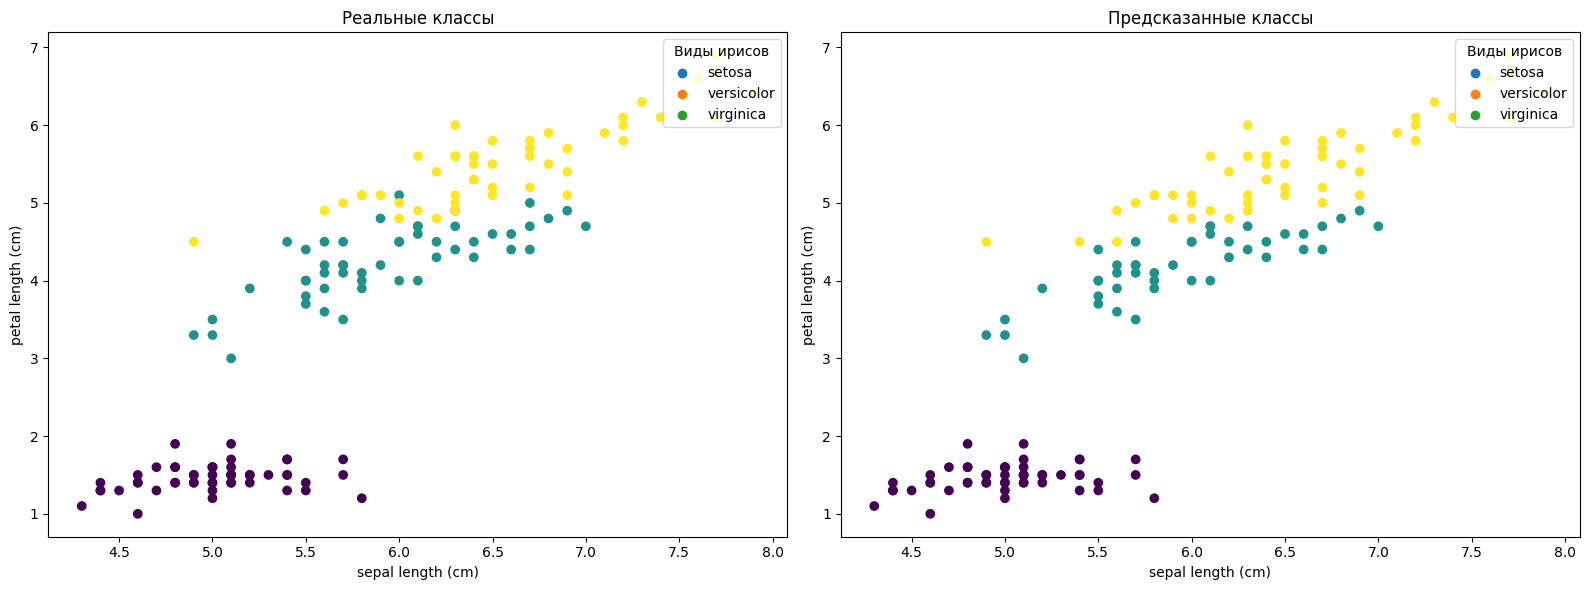

In [82]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Ещё раз загрузим исходник, так проще
iris = load_iris()

# Две доски под графики
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Реальные классы
axs[0].scatter(iris.data[:, 0], iris.data[:, 2], c=iris.target)
axs[0].set_xlabel(iris.feature_names[0])  # Длина чашелистиков
axs[0].set_ylabel(iris.feature_names[2])  # Длина лепестков
axs[0].set_title("Реальные классы")
for i, target_name in enumerate(iris.target_names):
    axs[0].scatter([], [], label=target_name)
axs[0].legend(loc="upper right", title="Виды ирисов")

# График 2: Предсказанные классы
axs[1].scatter(iris.data[:, 0], iris.data[:, 2], c=y_pred)
axs[1].set_xlabel(iris.feature_names[0])  # Длина чашелистиков
axs[1].set_ylabel(iris.feature_names[2])  # Длина лепестков
axs[1].set_title("Предсказанные классы")
for i, target_name in enumerate(iris.target_names):
    axs[1].scatter([], [], label=target_name)
axs[1].legend(loc="upper right", title="Виды ирисов")

# Отображаем
plt.tight_layout()
plt.show()

Task 2

In [90]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from tqdm import tqdm


digits = load_digits()

# Признаки и целевые значения
_global_var_data_x = torch.tensor(digits.data, dtype=torch.float32)
_global_var_target = torch.tensor(digits.target, dtype=torch.int64)


class WineDataset(data.Dataset):
    def __init__(self):
        self.data = _global_var_data_x # тензор размерностью (178, 13), тип float32
        self.target = _global_var_target # тензор размерностью (178, ), тип int64 (long)

        self.length = len(self.target)  # размер выборки
        self.categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # названия классов

    def __getitem__(self, item):
        return self.data[item], self.target[item]
        # возврат образа по индексу item в виде кортежа: (данные, целевое значение)

    def __len__(self):
        return self.length
        # возврат размера выборки

# здесь продолжайте программу
class WineClassModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(64, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        x = torch.relu(x)
        x = self.layer3(x)
        return x

model = WineClassModel()
model.train()

batch_size = 16
epochs = 30

d_data = WineDataset()
train_data = data.DataLoader(d_data, batch_size, shuffle=True, drop_last=False)

optimizer = optim.Adam(params=model.parameters(), lr=0.01)
loss_func = nn.CrossEntropyLoss()

for _e in range(epochs):
    train_tqdm = tqdm(train_data, leave=True)
    for x_train, y_train in train_tqdm:
        predict = model(x_train).squeeze()
        loss = loss_func(predict, y_train.long())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

model.eval()
y_pred = torch.argmax(model(d_data.data), dim=1)
Q = torch.sum(y_pred.data == d_data.target).item() / len(d_data)

100%|██████████| 113/113 [00:00<00:00, 470.37it/s]


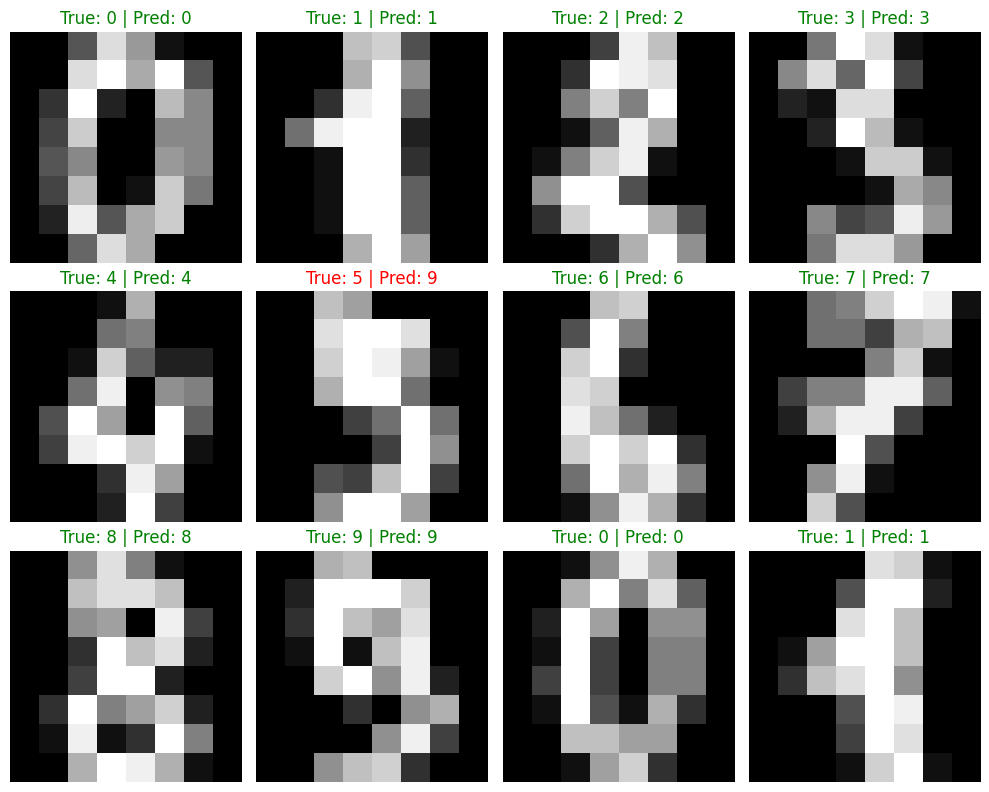

In [91]:
import matplotlib.pyplot as plt

# Визуализация нескольких примеров
n_samples = 12
fig, axes = plt.subplots(3, 4, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    image = d_data.data[i].reshape(8, 8).detach().numpy()
    true_label = d_data.target[i].item()
    pred_label = y_pred[i].item()

    ax.imshow(image, cmap='gray')
    ax.set_title(f'True: {true_label} | Pred: {pred_label}',
                 color='green' if true_label == pred_label else 'red')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [92]:
Q

0.9727323316638843